In [50]:
import numpy as np
import pandas as pd

crime_anal_police = pd.read_excel('../data/01.crime_seoul.xlsx', encoding = 'utf-8')
crime_anal_police = crime_anal_police.drop(0)
crime_anal_police = crime_anal_police.transpose()
crime_anal_police.rename(columns={crime_anal_police.columns[0] : '구별'}, inplace=True)
crime_anal_police.rename(columns={crime_anal_police.columns[1] : '발생합계',
                          crime_anal_police.columns[2] : '검거합계',
                          crime_anal_police.columns[3] : '살인발생',
                          crime_anal_police.columns[4] : '살인검거',
                          crime_anal_police.columns[5] : '강도발생',
                          crime_anal_police.columns[6] : '강도검거',
                          crime_anal_police.columns[7] : '강간발생',
                          crime_anal_police.columns[8] : '강간검거',
                          crime_anal_police.columns[9] : '절도발생',
                          crime_anal_police.columns[10] : '절도검거',
                          crime_anal_police.columns[11] : '폭력발생',
                          crime_anal_police.columns[12] : '폭력검거'}, inplace=True)
crime_anal_police = crime_anal_police[3:]
crime_anal_police.set_index('구별', inplace=True)
crime_anal_police['살인검거율'] = crime_anal_police['살인검거']/crime_anal_police['살인발생']*100
crime_anal_police['강도검거율'] = crime_anal_police['강도검거']/crime_anal_police['강도발생']*100
crime_anal_police['강간검거율'] = crime_anal_police['강간검거']/crime_anal_police['강간발생']*100
crime_anal_police['절도검거율'] = crime_anal_police['절도검거']/crime_anal_police['절도발생']*100
crime_anal_police['폭력검거율'] = crime_anal_police['폭력검거']/crime_anal_police['폭력발생']*100

del crime_anal_police['살인검거']
del crime_anal_police['강도검거']
del crime_anal_police['강간검거']
del crime_anal_police['절도검거']
del crime_anal_police['폭력검거']

crime_anal_police[2:]
con_list = ['살인검거율', '강도검거율', '강간검거율', '절도검거율', '폭력검거율']

for column in con_list:
    crime_anal_police.loc[crime_anal_police[column] > 100, column] = 100
    
del crime_anal_police['발생합계']
del crime_anal_police['검거합계']

crime_anal_police

,살인발생,강도발생,강간발생,절도발생,폭력발생,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
종로구,4,7,238,1515,2082,100,100,100,70.5611,90.8742
중구,2,6,195,2202,1922,50,83.3333,58.9744,47.6839,84.9636
용산구,3,3,272,999,2036,100,100,87.1324,54.4545,89.5383
성동구,6,9,133,970,1394,83.3333,100,72.1805,52.6804,87.231
광진구,4,6,273,1875,1853,100,83.3333,78.022,53.76,85.537
동대문구,6,10,168,1531,1977,100,90,85.119,54.017,92.7162
중랑구,10,4,138,1666,2450,100,100,78.2609,54.5018,86
성북구,3,3,176,1082,1613,100,100,73.8636,67.5601,90.2666
강북구,6,3,176,1229,2424,100,66.6667,82.3864,54.0277,91.0066


In [51]:
from sklearn import preprocessing

col = ['살인발생', '강도발생', '강간발생', '절도발생', '폭력발생']

x = crime_anal_police[col].values
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x.astype(float))
crime_anal_norm = pd.DataFrame(x_scaled, columns = col, index = crime_anal_police.index)

col2 = ['살인검거율', '강도검거율', '강간검거율', '절도검거율', '폭력검거율']
crime_anal_norm[col2] = crime_anal_police[col2]
crime_anal_norm

,살인발생,강도발생,강간발생,절도발생,폭력발생,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
종로구,0.250000,0.428571,0.256944,0.332569,0.352506,100,100,100,70.5611,90.8742
중구,0.083333,0.357143,0.182292,0.647706,0.286771,50,83.3333,58.9744,47.6839,84.9636
용산구,0.166667,0.142857,0.315972,0.095872,0.333607,100,100,87.1324,54.4545,89.5383
성동구,0.416667,0.571429,0.074653,0.082569,0.069844,83.3333,100,72.1805,52.6804,87.231
광진구,0.250000,0.357143,0.317708,0.497706,0.258422,100,83.3333,78.022,53.76,85.537
동대문구,0.416667,0.642857,0.135417,0.339908,0.309367,100,90,85.119,54.017,92.7162
중랑구,0.750000,0.214286,0.083333,0.401835,0.503698,100,100,78.2609,54.5018,86
성북구,0.166667,0.142857,0.149306,0.133945,0.159819,100,100,73.8636,67.5601,90.2666
강북구,0.416667,0.142857,0.149306,0.201376,0.493016,100,66.6667,82.3864,54.0277,91.0066


In [52]:
col = ['살인발생', '강도발생', '강간발생', '절도발생', '폭력발생']
col2 = ['살인검거율', '강도검거율', '강간검거율', '절도검거율', '폭력검거율']

crime_anal_norm['범죄'] = np.sum(crime_anal_norm[col], axis= 1)
crime_anal_norm['검거율 합'] = np.sum(crime_anal_norm[col2], axis= 1)

crime_anal_norm

,살인발생,강도발생,강간발생,절도발생,폭력발생,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,범죄,검거율 합
구별,,,,,,,,,,,,
종로구,0.250000,0.428571,0.256944,0.332569,0.352506,100,100,100,70.5611,90.8742,1.620591,461.435216
중구,0.083333,0.357143,0.182292,0.647706,0.286771,50,83.3333,58.9744,47.6839,84.9636,1.557245,324.955196
용산구,0.166667,0.142857,0.315972,0.095872,0.333607,100,100,87.1324,54.4545,89.5383,1.054975,431.125118
성동구,0.416667,0.571429,0.074653,0.082569,0.069844,83.3333,100,72.1805,52.6804,87.231,1.215161,395.425187
광진구,0.250000,0.357143,0.317708,0.497706,0.258422,100,83.3333,78.022,53.76,85.537,1.680980,400.652278
동대문구,0.416667,0.642857,0.135417,0.339908,0.309367,100,90,85.119,54.017,92.7162,1.844216,421.852267
중랑구,0.750000,0.214286,0.083333,0.401835,0.503698,100,100,78.2609,54.5018,86,1.953152,418.762670
성북구,0.166667,0.142857,0.149306,0.133945,0.159819,100,100,73.8636,67.5601,90.2666,0.752594,431.690294
강북구,0.416667,0.142857,0.149306,0.201376,0.493016,100,66.6667,82.3864,54.0277,91.0066,1.403221,394.087296


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [54]:
import platform
path='c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')

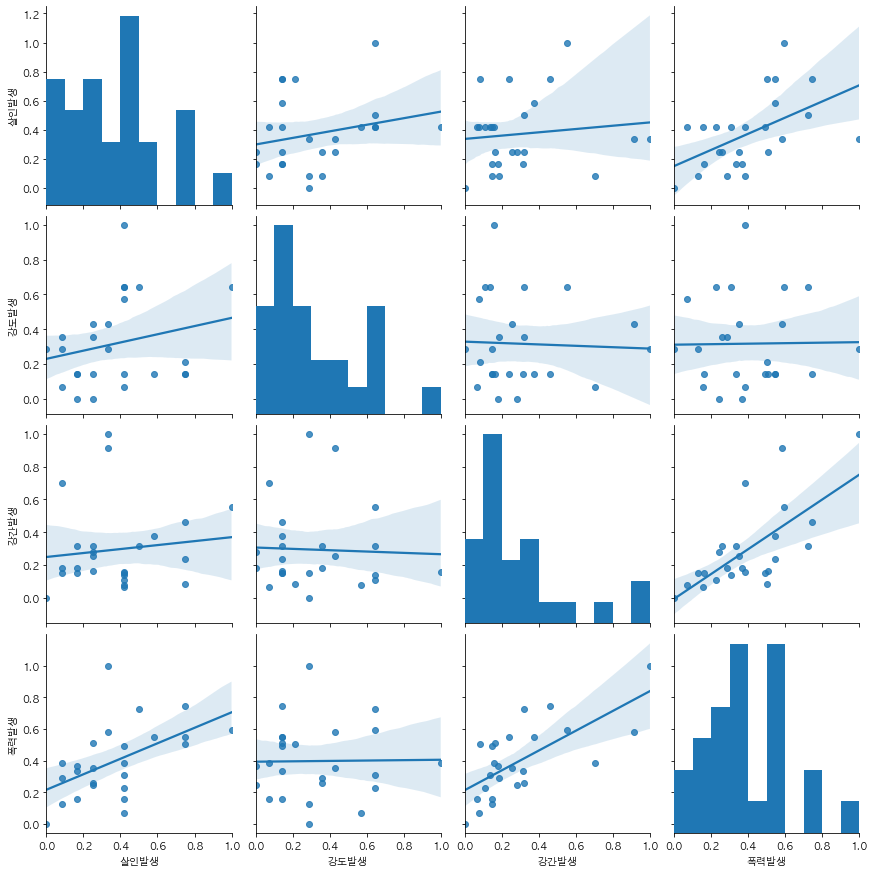

In [55]:
sns.pairplot(crime_anal_norm, vars=['살인발생', '강도발생', '강간발생', '폭력발생'], kind='reg', height=3)
plt.show()

In [56]:
result_CCTV = pd.read_excel('../data/01.result_data.xlsx', encoding='utf-8', index_col='구별')
crime_anal_norm[['인구수', 'CCTV']] = result_CCTV[['인구수', '소계']]
crime_anal_norm

,살인발생,강도발생,강간발생,절도발생,폭력발생,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,범죄,검거율 합,인구수,CCTV
구별,,,,,,,,,,,,,,
종로구,0.250000,0.428571,0.256944,0.332569,0.352506,100,100,100,70.5611,90.8742,1.620591,461.435216,160520,1471
중구,0.083333,0.357143,0.182292,0.647706,0.286771,50,83.3333,58.9744,47.6839,84.9636,1.557245,324.955196,136030,1544
용산구,0.166667,0.142857,0.315972,0.095872,0.333607,100,100,87.1324,54.4545,89.5383,1.054975,431.125118,245362,2063
성동구,0.416667,0.571429,0.074653,0.082569,0.069844,83.3333,100,72.1805,52.6804,87.231,1.215161,395.425187,304851,2679
광진구,0.250000,0.357143,0.317708,0.497706,0.258422,100,83.3333,78.022,53.76,85.537,1.680980,400.652278,363925,1581
동대문구,0.416667,0.642857,0.135417,0.339908,0.309367,100,90,85.119,54.017,92.7162,1.844216,421.852267,360380,2003
중랑구,0.750000,0.214286,0.083333,0.401835,0.503698,100,100,78.2609,54.5018,86,1.953152,418.762670,399415,1068
성북구,0.166667,0.142857,0.149306,0.133945,0.159819,100,100,73.8636,67.5601,90.2666,0.752594,431.690294,452290,3003
강북구,0.416667,0.142857,0.149306,0.201376,0.493016,100,66.6667,82.3864,54.0277,91.0066,1.403221,394.087296,315395,1265


In [57]:
crime_anal_norm = crime_anal_norm.sort_values(by='검거율 합', ascending=False)
crime_anal_norm

,살인발생,강도발생,강간발생,절도발생,폭력발생,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,범죄,검거율 합,인구수,CCTV
구별,,,,,,,,,,,,,,
종로구,0.250000,0.428571,0.256944,0.332569,0.352506,100,100,100,70.5611,90.8742,1.620591,461.435216,160520,1471
은평구,0.166667,0.000000,0.180556,0.355505,0.366886,100,100,83.5052,62.4281,87.7185,1.069613,433.651739,483938,2962
성북구,0.166667,0.142857,0.149306,0.133945,0.159819,100,100,73.8636,67.5601,90.2666,0.752594,431.690294,452290,3003
용산구,0.166667,0.142857,0.315972,0.095872,0.333607,100,100,87.1324,54.4545,89.5383,1.054975,431.125118,245362,2063
도봉구,0.000000,0.285714,0.000000,0.000000,0.000000,100,100,92.2222,49.8734,82.8431,0.285714,424.938777,331744,858
강서구,0.583333,0.142857,0.375000,0.577982,0.547658,100,100,83.9869,52.5366,85.8819,2.226830,422.405406,593203,1617
동대문구,0.416667,0.642857,0.135417,0.339908,0.309367,100,90,85.119,54.017,92.7162,1.844216,421.852267,360380,2003
중랑구,0.750000,0.214286,0.083333,0.401835,0.503698,100,100,78.2609,54.5018,86,1.953152,418.762670,399415,1068
노원구,0.250000,0.142857,0.163194,0.324771,0.509449,100,100,85.8696,45.4606,85.9578,1.390272,417.287972,533041,1906


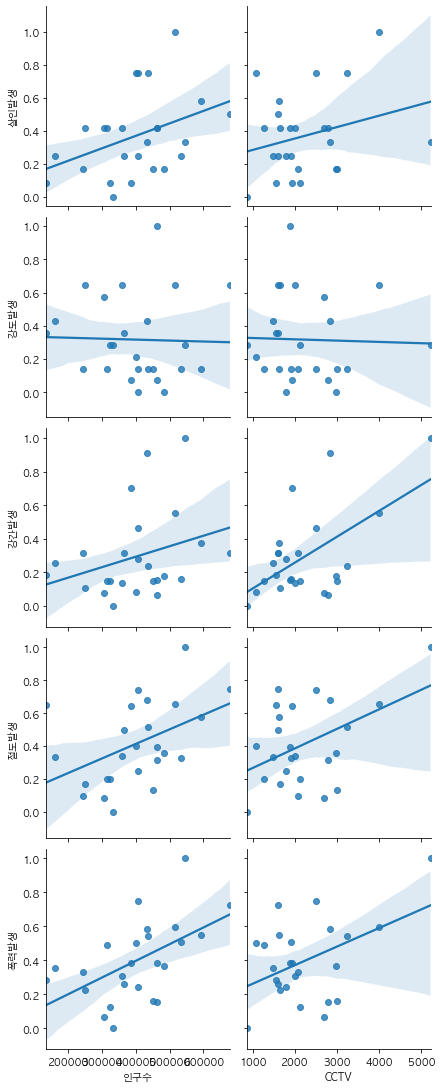

In [58]:
sns.pairplot(crime_anal_norm, x_vars=['인구수', 'CCTV'], y_vars=['살인발생', '강도발생', '강간발생', '절도발생', '폭력발생'], kind='reg', height=3)
plt.show()

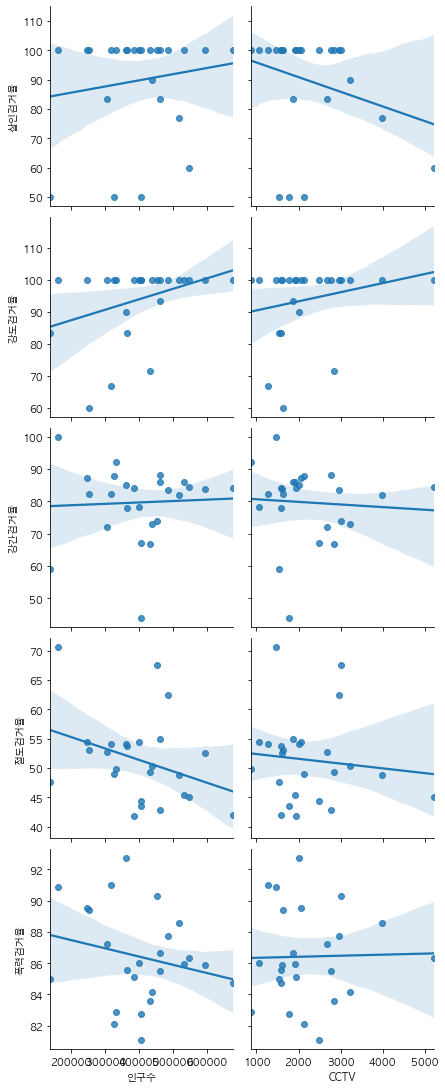

In [59]:
sns.pairplot(crime_anal_norm, x_vars=['인구수', 'CCTV'], y_vars=['살인검거율', '강도검거율', '강간검거율', '절도검거율', '폭력검거율'], kind='reg', height=3)
plt.show()

In [60]:
tmp_max = crime_anal_norm['검거율 합'].max()
crime_anal_norm['검거'] = crime_anal_norm['검거율 합'] / tmp_max * 100
crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', ascending=False)
crime_anal_norm_sort

,살인발생,강도발생,강간발생,절도발생,폭력발생,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,범죄,검거율 합,인구수,CCTV,검거
구별,,,,,,,,,,,,,,,
종로구,0.250000,0.428571,0.256944,0.332569,0.352506,100,100,100,70.5611,90.8742,1.620591,461.435216,160520,1471,100.000000
은평구,0.166667,0.000000,0.180556,0.355505,0.366886,100,100,83.5052,62.4281,87.7185,1.069613,433.651739,483938,2962,93.978900
성북구,0.166667,0.142857,0.149306,0.133945,0.159819,100,100,73.8636,67.5601,90.2666,0.752594,431.690294,452290,3003,93.553825
용산구,0.166667,0.142857,0.315972,0.095872,0.333607,100,100,87.1324,54.4545,89.5383,1.054975,431.125118,245362,2063,93.431343
도봉구,0.000000,0.285714,0.000000,0.000000,0.000000,100,100,92.2222,49.8734,82.8431,0.285714,424.938777,331744,858,92.090669
강서구,0.583333,0.142857,0.375000,0.577982,0.547658,100,100,83.9869,52.5366,85.8819,2.226830,422.405406,593203,1617,91.541649
동대문구,0.416667,0.642857,0.135417,0.339908,0.309367,100,90,85.119,54.017,92.7162,1.844216,421.852267,360380,2003,91.421775
중랑구,0.750000,0.214286,0.083333,0.401835,0.503698,100,100,78.2609,54.5018,86,1.953152,418.762670,399415,1068,90.752213
노원구,0.250000,0.142857,0.163194,0.324771,0.509449,100,100,85.8696,45.4606,85.9578,1.390272,417.287972,533041,1906,90.432624


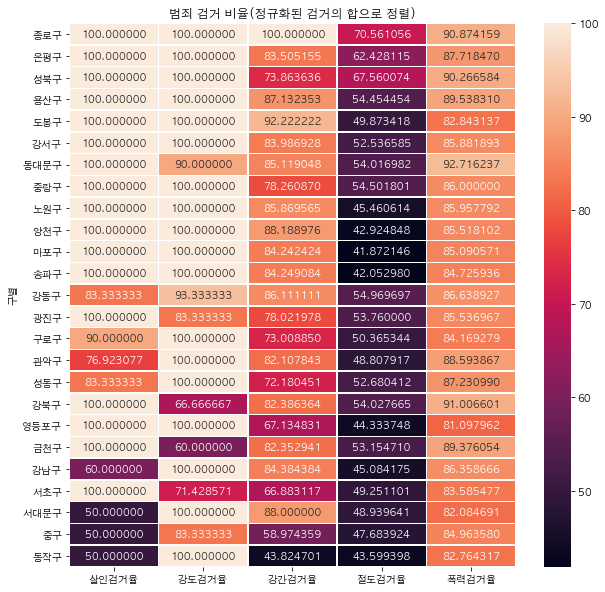

In [61]:
target_col = ['살인검거율', '강도검거율', '강간검거율', '절도검거율', '폭력검거율']
crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', ascending=False)
crime_anal_norm_sort.fillna(value=np.nan, inplace=True)

plt.figure(figsize = (10, 10))
sns.heatmap(crime_anal_norm_sort[target_col], annot=True, fmt='f', linewidths=.5)
plt.title('범죄 검거 비율(정규화된 검거의 합으로 정렬)')
plt.show()

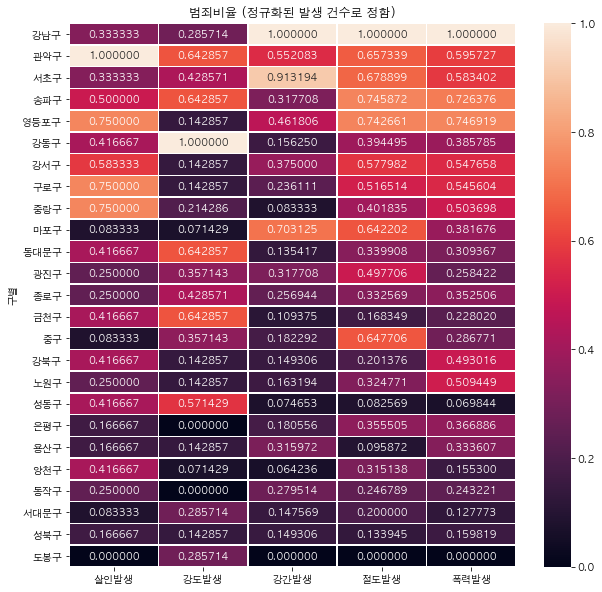

In [63]:
target_col = ['살인발생', '강도발생', '강간발생', '절도발생', '폭력발생']
crime_anal_norm['범죄'] = crime_anal_norm['범죄'] / 5
crime_anal_norm_sort = crime_anal_norm.sort_values(by='범죄', ascending=False)
crime_anal_norm_sort.fillna(value=np.nan, inplace=True)

plt.figure(figsize = (10, 10))
sns.heatmap(crime_anal_norm_sort[target_col], annot=True, fmt='f', linewidths=.5)
plt.title('범죄비율 (정규화된 발생 건수로 정함)')
plt.show()

In [64]:
crime_anal_norm.to_csv('../data/02.crime_in_seoul.final.csv', sep=',', encoding='utf-8')

In [65]:
import folium
import json

In [66]:
geo_path = '../data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [69]:
map = folium.Map(location= [37.5502, 126.982], zoom_start = 11, titles = 'Stamen Toner')
map.choropleth(geo_data = geo_str, data = crime_anal_norm['살인발생'], columns = [crime_anal_norm.index, crime_anal_norm['살인발생']], fill_color = 'PuRd', key_on = 'feature.id')
map

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [70]:
map = folium.Map(location= [37.5502, 126.982], zoom_start = 11, titles = 'Stamen Toner')
map.choropleth(geo_data = geo_str, data = crime_anal_norm['강간발생'], columns = [crime_anal_norm.index, crime_anal_norm['강간발생']], fill_color = 'PuRd', key_on = 'feature.id')
map

In [71]:
map = folium.Map(location= [37.5502, 126.982], zoom_start = 11, titles = 'Stamen Toner')
map.choropleth(geo_data = geo_str, data = crime_anal_norm['강도발생'], columns = [crime_anal_norm.index, crime_anal_norm['강도발생']], fill_color = 'PuRd', key_on = 'feature.id')
map

In [72]:
map = folium.Map(location= [37.5502, 126.982], zoom_start = 11, titles = 'Stamen Toner')
map.choropleth(geo_data = geo_str, data = crime_anal_norm['절도발생'], columns = [crime_anal_norm.index, crime_anal_norm['절도발생']], fill_color = 'PuRd', key_on = 'feature.id')
map

In [73]:
map = folium.Map(location= [37.5502, 126.982], zoom_start = 11, titles = 'Stamen Toner')
map.choropleth(geo_data = geo_str, data = crime_anal_norm['폭력발생'], columns = [crime_anal_norm.index, crime_anal_norm['폭력발생']], fill_color = 'PuRd', key_on = 'feature.id')
map

In [74]:
map = folium.Map(location= [37.5502, 126.982], zoom_start = 11, titles = 'Stamen Toner')
map.choropleth(geo_data = geo_str, data = crime_anal_norm['범죄'], columns = [crime_anal_norm.index, crime_anal_norm['범죄']], fill_color = 'PuRd', key_on = 'feature.id')
map

In [75]:
tmp_criminal = crime_anal_norm['범죄'] / crime_anal_norm['인구수'] * 1000000
map = folium.Map(location = [37.5502, 126.982], zoom_start = 11, titles = 'Stamen Toner')

map.choropleth(geo_data = geo_str, data = tmp_criminal, columns = [crime_anal_norm.index, tmp_criminal], fill_color = 'PuRd', key_on = 'feature.id')
map

In [77]:
crime_anal_police = pd.read_excel('../data/01.crime_seoul.xlsx', encoding = 'utf-8')
crime_anal_police

,01.crime_seoul,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,5대범죄,5대범죄현황,2019,2019,2019,2019,2019,2019,2019,2019,...,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019
1,5대범죄,5대범죄현황,합계,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
2,합계,발생,103668,3846,4327,3313,2512,4011,3692,4268,...,4924,4707,3105,5820,3400,5328,5542,7304,5698,4014
3,합계,검거,74805,4117,2804,2611,1838,2816,2818,3138,...,3543,3291,2343,3787,2195,3810,3750,5069,3799,2955
4,살인,발생,136,4,2,3,6,4,6,10,...,8,10,6,10,4,13,5,5,7,6
5,살인,검거,128,5,1,3,5,5,6,10,...,9,9,6,10,2,10,5,3,8,5
6,강도,발생,136,7,6,3,9,6,10,4,...,3,3,10,3,1,10,7,5,10,15
7,강도,검거,133,8,5,4,10,5,9,5,...,4,4,6,3,1,11,5,6,10,14
8,강간강제추행,발생,6469,238,195,272,133,273,168,138,...,306,226,153,356,251,408,616,666,273,180
9,강간강제추행,검거,6007,1143,115,237,96,213,143,108,...,257,165,126,239,110,335,412,562,230,155
